# <b>plot</b>

The `plot` function is the primary vehicle for visualizing x-y data.  At a minimum, the `plot` function requires the following keywords:
<ul>
<li> `df`: a pandas DataFrame</li>
<li> `x`: the name of the DataFrame column containing the x-axis data </li>
<li> `y`: the name of the DataFrame column containing the y-axis data </li>
</ul>

Other optional keywords are described in <a href="https://endangeredoxen.github.io/fivecentplots/keyword.html">Keyword Arguments</a>.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace

### Sample data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data.csv'))
df.head()

,Substrate,Target Wavelength,Boost Level,Temperature [C],Die,Voltage,I Set,I [A]
0,Si,450,0.2,25,"(1,1)",0.0,0.0,0.0
1,Si,450,0.2,25,"(1,1)",0.1,0.0,0.0
2,Si,450,0.2,25,"(1,1)",0.2,0.0,0.0
3,Si,450,0.2,25,"(1,1)",0.3,0.0,0.0
4,Si,450,0.2,25,"(1,1)",0.4,0.0,0.0


### Set theme

(Only needs to be run once)

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## XY Plots

### Scatter

A simple XY plot with no lines or legend

I [A] vs Voltage.png


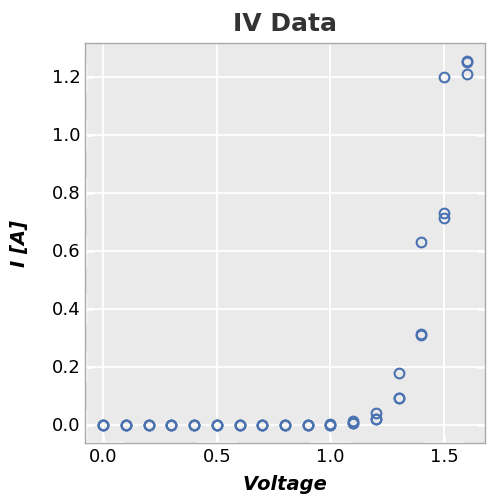

In [5]:
fcp.plot(df=df, x='Voltage', y='I [A]', inline=True, title='IV Data', lines=False, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Legend

Add a legend by the column "Die"

I [A] vs Voltage.png


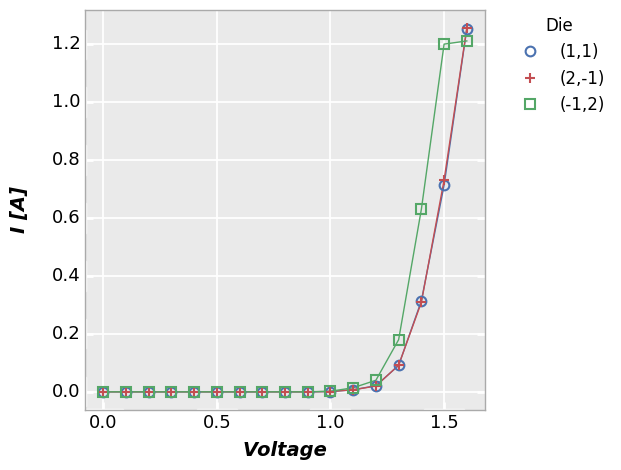

In [6]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', inline=True, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Log scale

Log-scaled axes can be enabled through the kwargs "ax_scale".  Valid options:
* x-only: <font color="blue" style="font-family:'Courier New'"> logx | semilogx </font>
* y-only: <font color="blue" style="font-family:'Courier New'"> logy | semilogy </font>
* both: <font color="blue" style="font-family:'Courier New'"> loglog | log </font>
* symlog: <font color="blue" style="font-family:'Courier New'"> symlog </font> (doesn't work in matploblib 1.5.1)
* logit: <font color="blue" style="font-family:'Courier New'"> logit </font>

I [A] vs Voltage.png


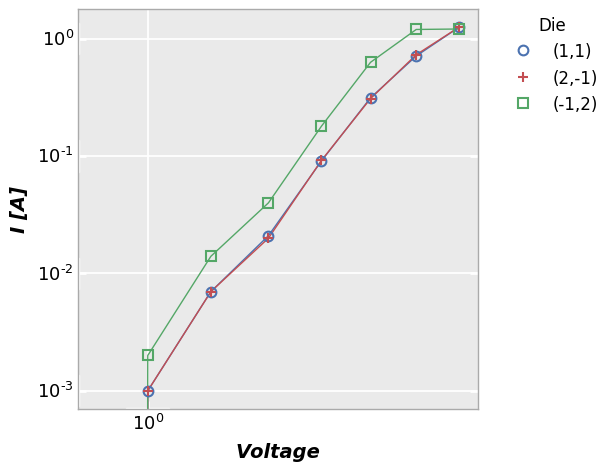

In [7]:
fcp.plot(df=df, x='Voltage', y='I [A]', ax_scale='loglog', legend='Die', inline=True, show=SHOW, xmin=0.9,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

## Secondary x|y plots

### Shared x-axis (twin_x)

Voltage + I [A] vs Voltage.png


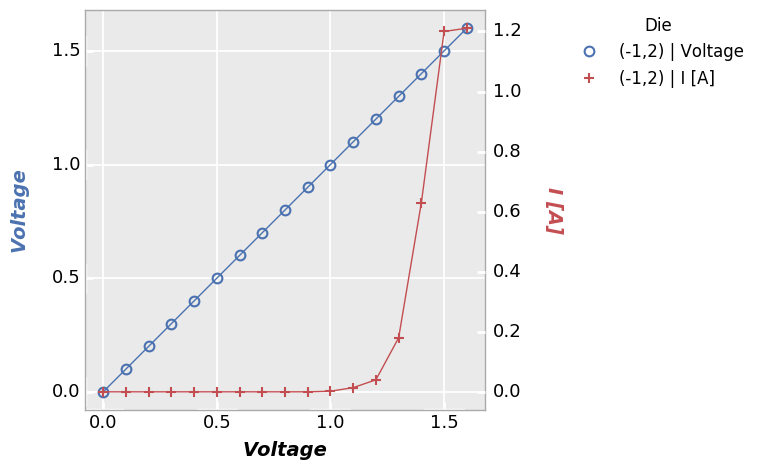

In [8]:
fcp.plot(df=df, x='Voltage', y=['Voltage', 'I [A]'], inline=True, twin_x=True, show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

### Shared y-axis (twin_y)

Voltage vs Voltage + I [A].png


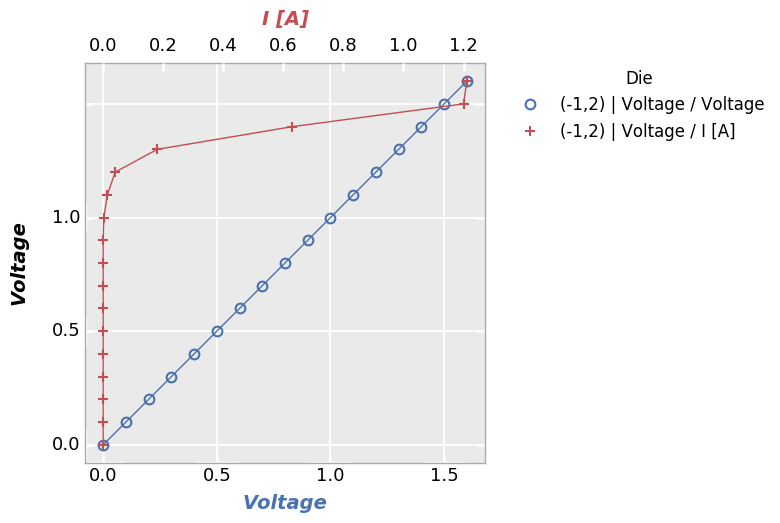

In [9]:
fcp.plot(df=df, x=['Voltage', 'I [A]'], y='Voltage', legend='Die', inline=True, twin_y=True, show=SHOW, \
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

## Multiple x & y values

MORE. Notice the absence of the <font style="font-family:'Courier New'">twinx</font> and <font style="font-family:'Courier New'">twiny</font> parameters.

### Multiple y only

Boost Level + I [A] vs Voltage.png


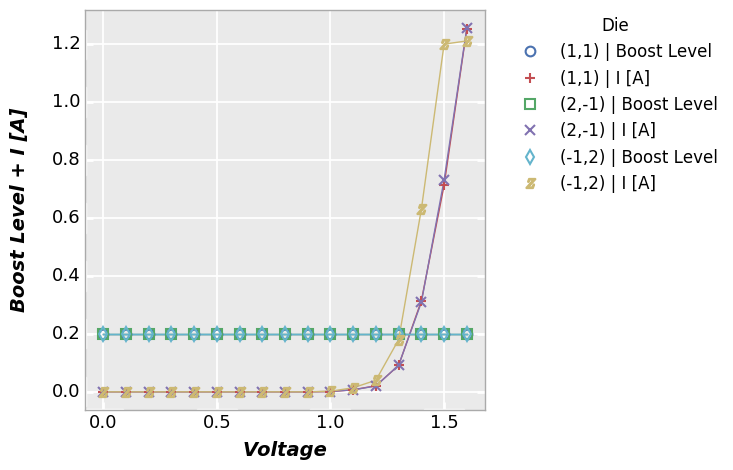

In [10]:
fcp.plot(df=df, x='Voltage', y=['Boost Level', 'I [A]'], legend='Die', inline=True, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Multiple x only

Voltage vs Boost Level + I [A].png


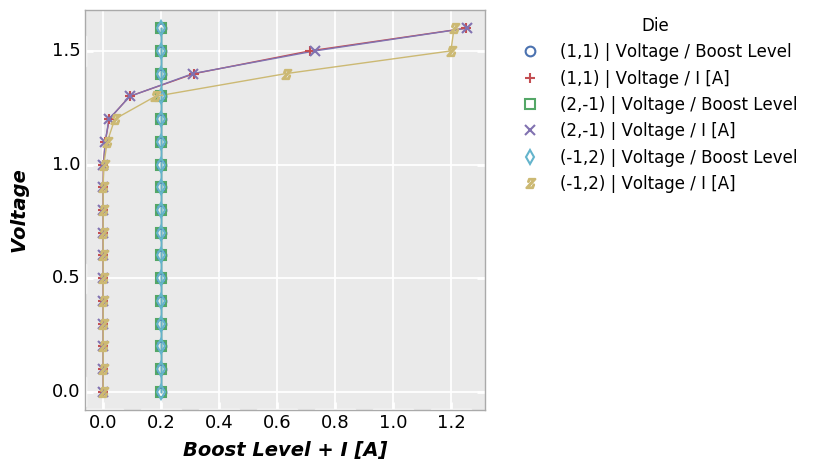

Wall time: 916 ms


In [11]:
%time fcp.plot(df=df, x=['Boost Level', 'I [A]'], y='Voltage', legend='Die', inline=True, show=SHOW, \
               filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Both

Voltage + Temperature [C] vs Boost Level + I [A].png


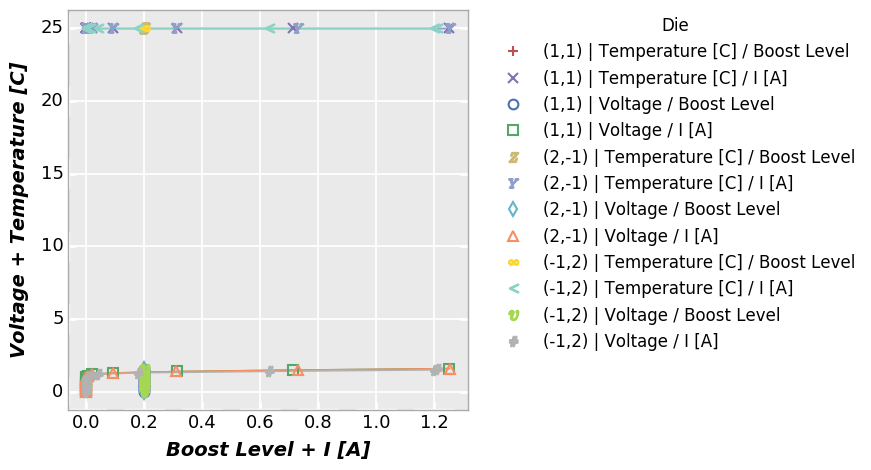

Wall time: 1.25 s


In [12]:
%time fcp.plot(df=df, x=['Boost Level', 'I [A]'], y=['Voltage', 'Temperature [C]'], legend='Die', show=SHOW, \
               filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

## Grid plots

### Row plot

Create a unique plot for each unique value of the "row" column in the specified DataFrame.  Plots are arranged row by row in a single column.  Each row contains a label indicating the unique value of the "row" column.

I [A] vs Voltage by Boost Level.png


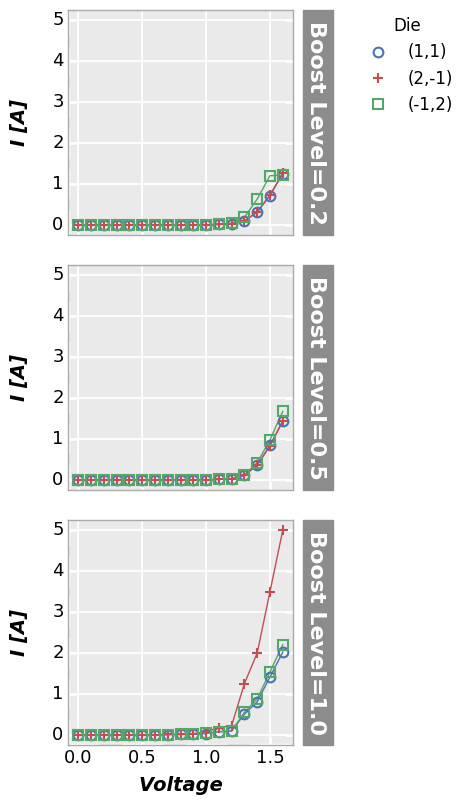

Wall time: 1.46 s


In [13]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', row='Boost Level', show=SHOW, ax_size=[225, 225], \
               filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

### Column plot

Create a unique plot for each unique value of the "col" column in the specified DataFrame.  Plots are arranged in a single row, column by column.  Each column contains a label indicating the unique value of the "col" column.

I [A] vs Voltage by Boost Level.png


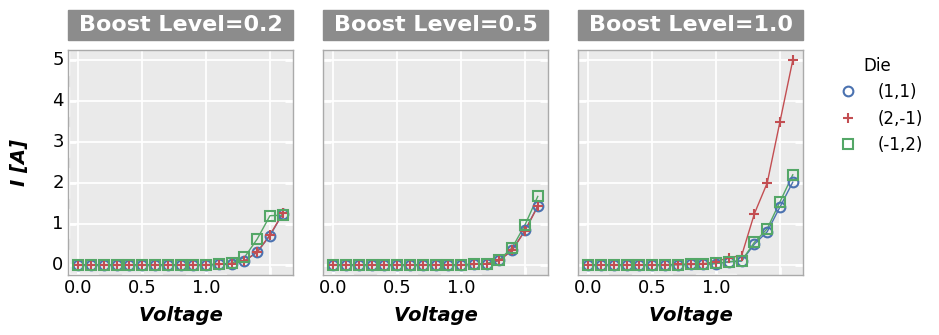

Wall time: 1.36 s


In [14]:
%time fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', show=SHOW, ax_size=[225, 225], \
               filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==25')

### Row x column grid

Remove "Temperature [C]" from the DataFrame subset and make a grid of plots for each unique combination of "row" and "col" values.  Both "row" and "col" labels are included.

I [A] vs Voltage by Temperature [C] by Boost Level.png


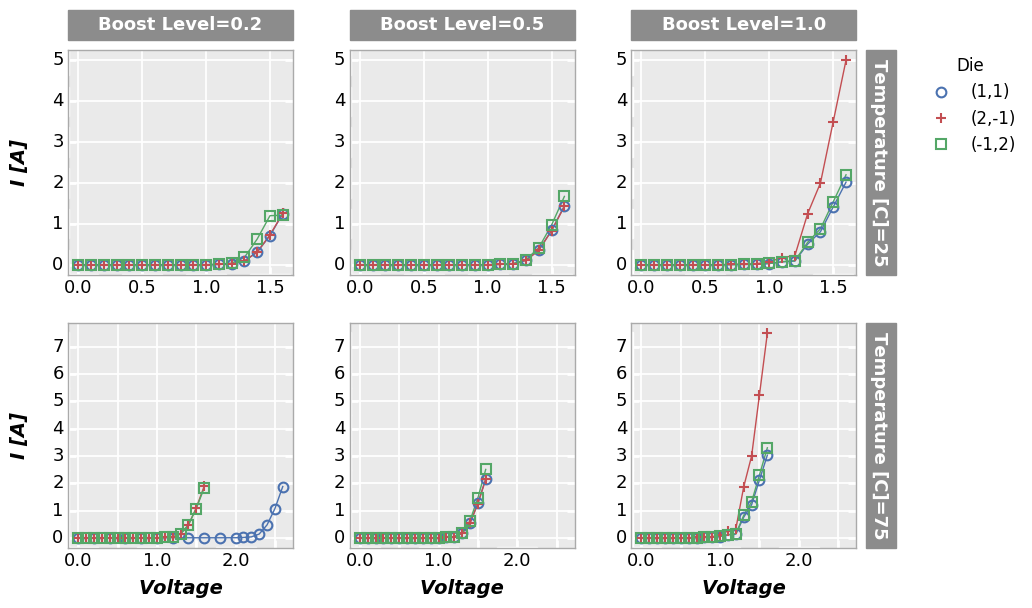

In [15]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', show=SHOW, \
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', share_row=True, label_rc_font_size=13)

### Wrap plot

A wrap plot is an alternate view of the row x column plot.  For wrap plots, the row and column labels are condensed into a  single label above each plot window and the spacing between plots is eliminated (by default; can be overriden).  The x and y sizes of the grid are determined by the square root of the total number of plot windows.  x and y axes ranges are shared.

I [A] vs Voltage by Temperature [C] + Boost Level.png


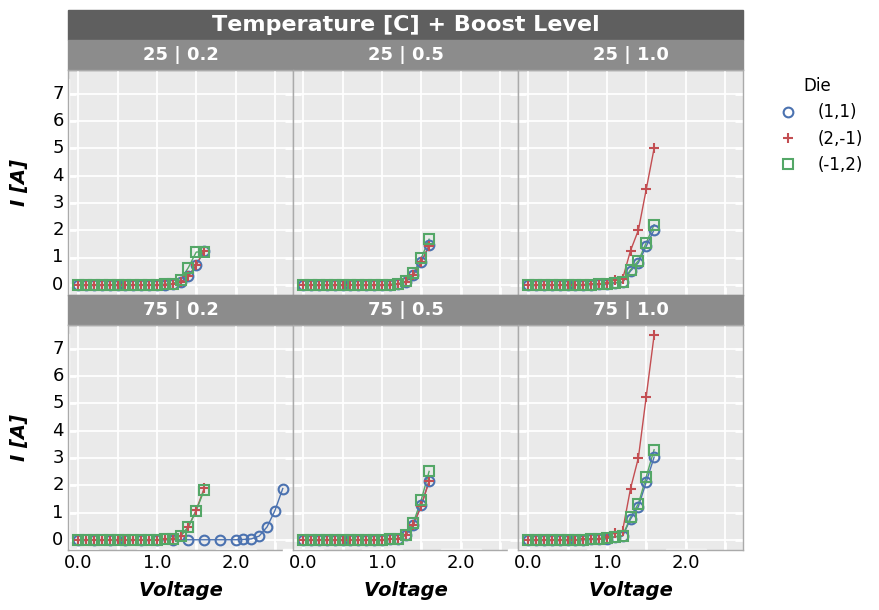

In [16]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'], show=SHOW, 
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', label_rc_font_size=13)

## Other options

### Line fit

We can add a polynomial line of fit of some degree to the plot with the keyword `line_fit` with an option to display the fit equation and R^2 value:

I [A] vs Voltage.png


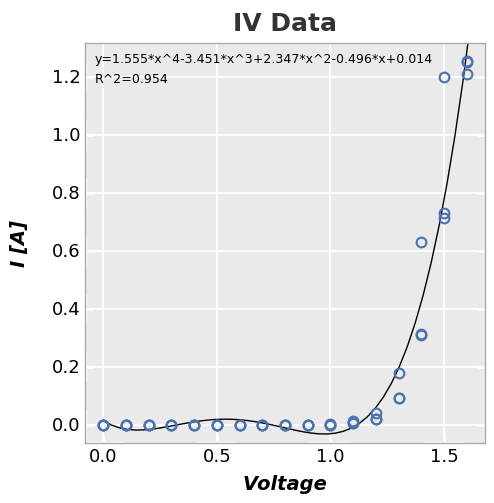

In [17]:
fcp.plot(df=df, x='Voltage', y='I [A]', inline=True, title='IV Data', lines=False, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fit=4, fit_eqn=True, fit_rsq=True, fit_font_size=9)

### Stat lines

Rather than drawing connecting lines between all points, you can draw a line through a representative statistic of the data, such as the "median" value of the points, using the `stat` keyword (any stats that can be applied to a pandas `groupby` object can be used).  For cases where the x-values are not identical for all data sets, use the keyword `stat_val` and specify an alternative x-axis to use for the statistical calculation (the actual plotted x-axis will be whatever is specified for the `x` keyword).

First consider a plot of Voltage vs I [A].  Because the actual measured current values vary from the current set point value from measurement to measurement, the x-values for each data set are not identical.  The `stat` line thus computes the median value for each x value where there may only be a single data point.  The result is ugly and useful.

Voltage vs I [A].png


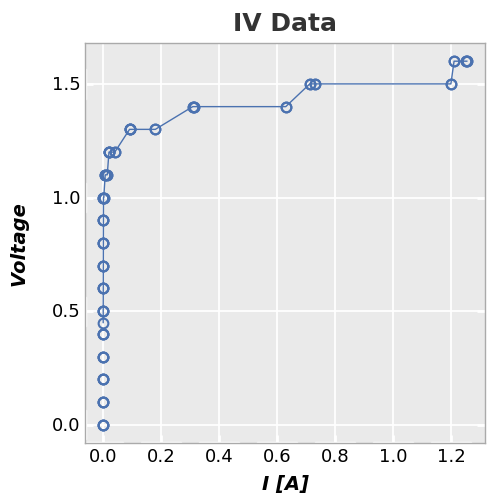

In [18]:
fcp.plot(df=df, x='I [A]', y='Voltage', inline=True, title='IV Data', lines=False, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         stat='median')

Instead, add the column name for the column containing the set point value of I [A] to the keyword `stat_val`:

Voltage vs I [A].png


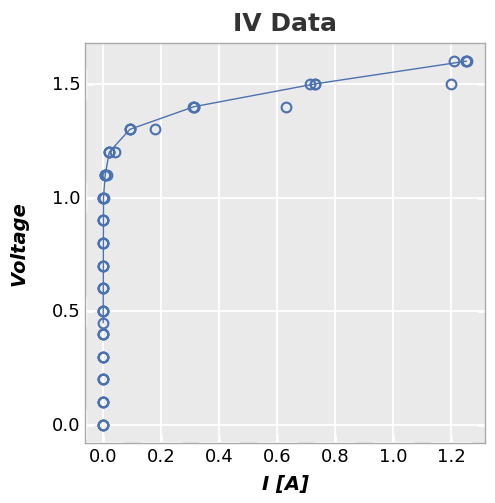

In [19]:
fcp.plot(df=df, x='I [A]', y='Voltage', inline=True, title='IV Data', lines=False, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         stat='median', stat_val='I Set')

### Confidence intervals

It is possible to display confidence intervals on a data set.  By default these are shown as partially transparent filled regions around a curve.  The actual confidence interval to display is set by the `conf_int` keyword.  Allowed values are any interval between 0 and 1 or the special value `range` which plots a region from the min to the max value of the data at a given point. The example below shows a 95% confidence interval:

I [A] vs Voltage.png


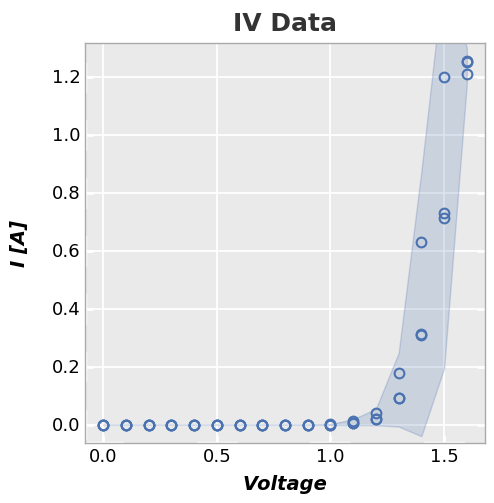

In [20]:
fcp.plot(df=df, x='Voltage', y='I [A]', inline=True, title='IV Data', lines=False, show=SHOW, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         conf_int=0.95)

### Reference line

We can add a reference line to the plot using the keyword `ref_line`.  The value of this keyword is: (1) an equation applied to an existing DataFrame column; or (2) a simple int or float.  This value is used to create a new column in the DataFrame that is plotted vs the value of `x`

#### y=x reference

I [A] vs Voltage.png


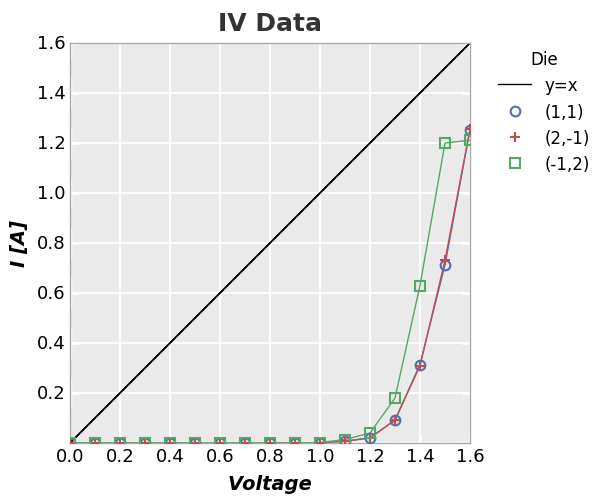

In [21]:
fcp.plot(df=df, x='Voltage', y='I [A]', inline=True, title='IV Data', show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ref_line=df['Voltage'], ref_line_text='y=x', xmin=0, ymin=0, xmax=1.6, ymax=1.6)

#### More complex calculation

Now let's use the fit equation calculated above and add the fit line as a reference line:

I [A] vs Voltage.png


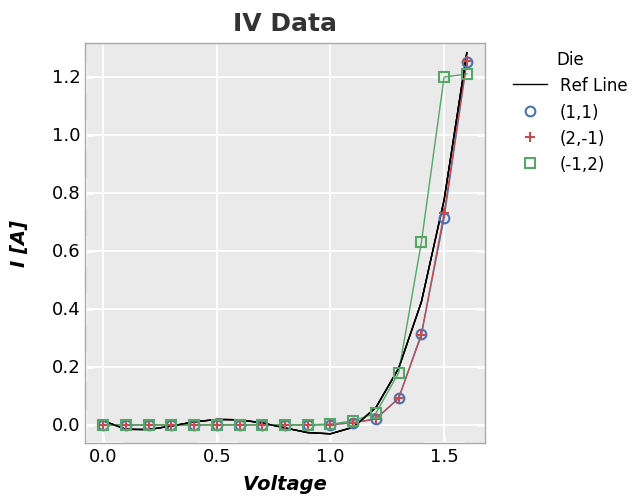

In [22]:
fcp.plot(df=df, x='Voltage', y='I [A]', inline=True, title='IV Data', show=SHOW, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ref_line=1.555*df['Voltage']**4-3.451*df['Voltage']**3+2.347*df['Voltage']**2-0.496*df['Voltage']+0.014)